In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

In [183]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
df=pd.concat([train,test]).reset_index()

In [184]:
df.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [185]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [187]:
pd.set_option('display.max_rows', 5000)
train_test_null_info=pd.DataFrame(df.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(df.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
index,0,int64
PassengerId,0,int64
Survived,418,float64
Pclass,0,int64
Sex,0,object
Age,263,float64
SibSp,0,int64
Parch,0,int64
Fare,1,float64
Embarked,2,object


In [188]:
g = {str(k): list(v) for k,v in df.groupby(df.dtypes, axis=1)}
g

{'int64': ['index', 'PassengerId', 'Pclass', 'SibSp', 'Parch'],
 'float64': ['Survived', 'Age', 'Fare'],
 'object': ['Sex', 'Embarked']}

In [189]:
df['Embarked']=df['Embarked'].fillna('S')

In [190]:
df[df.Fare.isnull()]

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1043,152,1044,NaN,3,male,60.5,0,0,NaN,S


In [191]:
g=df[(df['Embarked']=='S')&(df['Pclass']==3)]['Fare'].median()
df['Fare']=df['Fare'].fillna(g)

In [192]:
train_test_null_info=pd.DataFrame(df.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(df.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
index,0,int64
PassengerId,0,int64
Survived,418,float64
Pclass,0,int64
Sex,0,object
Age,263,float64
SibSp,0,int64
Parch,0,int64
Fare,0,float64
Embarked,0,object


In [193]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [194]:
titanic_dummies = pd.concat(dummies, axis=1)

In [195]:
df = pd.concat((df,titanic_dummies), axis=1)

In [196]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [197]:
test=df[df.Age.isnull()]
train=df[df.Age.notnull()]

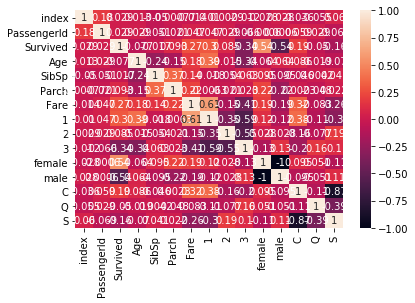

In [198]:
sns.heatmap(train.corr(),annot=True)
top_corr_features = corrmat.index[abs(corrmat["Age"])>0.0]

In [199]:
top_corr_features

Index([    'level_0',       'index', 'PassengerId',    'Survived',
               'Age',       'SibSp',       'Parch',        'Fare',
                   1,             2,             3,      'female',
              'male',           'C',           'Q',           'S'],
      dtype='object')

In [200]:
train_y = train.Age
predictor_cols = ['SibSp',1,2,3]

# Create training predictors data
train_X = train[predictor_cols]

my_model = linear_model.LinearRegression()
my_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
test_X = test[predictor_cols]
test['Age'] = my_model.predict(test_X)
test

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
5,5,6,0.0,26.852927,0,0,8.4583,0,0,1,0,1,0,1,0
17,17,18,1.0,31.017730,0,0,13.0000,0,1,0,0,1,0,0,1
19,19,20,1.0,26.852927,0,0,7.2250,0,0,1,1,0,1,0,0
26,26,27,0.0,26.852927,0,0,7.2250,0,0,1,0,1,1,0,0
28,28,29,1.0,26.852927,0,0,7.8792,0,0,1,1,0,0,1,0
29,29,30,0.0,26.852927,0,0,7.8958,0,0,1,0,1,0,0,1
31,31,32,1.0,37.261679,1,0,146.5208,1,0,0,1,0,1,0,0
32,32,33,1.0,26.852927,0,0,7.7500,0,0,1,1,0,0,1,0
36,36,37,1.0,26.852927,0,0,7.2292,0,0,1,0,1,1,0,0
42,42,43,0.0,26.852927,0,0,7.8958,0,0,1,0,1,1,0,0


In [202]:
test['Age']=test['Age'].round(decimals=0)
test['Age']=test['Age'].abs()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
test

,index,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
5,5,6,0.0,27.0,0,0,8.4583,0,0,1,0,1,0,1,0
17,17,18,1.0,31.0,0,0,13.0000,0,1,0,0,1,0,0,1
19,19,20,1.0,27.0,0,0,7.2250,0,0,1,1,0,1,0,0
26,26,27,0.0,27.0,0,0,7.2250,0,0,1,0,1,1,0,0
28,28,29,1.0,27.0,0,0,7.8792,0,0,1,1,0,0,1,0
29,29,30,0.0,27.0,0,0,7.8958,0,0,1,0,1,0,0,1
31,31,32,1.0,37.0,1,0,146.5208,1,0,0,1,0,1,0,0
32,32,33,1.0,27.0,0,0,7.7500,0,0,1,1,0,0,1,0
36,36,37,1.0,27.0,0,0,7.2292,0,0,1,0,1,1,0,0
42,42,43,0.0,27.0,0,0,7.8958,0,0,1,0,1,1,0,0


In [204]:
df=pd.concat([train,test]).reset_index()
df

,level_0,index,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,0,1,0.0,22.00,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,2,1.0,38.00,1,0,71.2833,1,0,0,1,0,1,0,0
2,2,2,3,1.0,26.00,0,0,7.9250,0,0,1,1,0,0,0,1
3,3,3,4,1.0,35.00,1,0,53.1000,1,0,0,1,0,0,0,1
4,4,4,5,0.0,35.00,0,0,8.0500,0,0,1,0,1,0,0,1
5,6,6,7,0.0,54.00,0,0,51.8625,1,0,0,0,1,0,0,1
6,7,7,8,0.0,2.00,3,1,21.0750,0,0,1,0,1,0,0,1
7,8,8,9,1.0,27.00,0,2,11.1333,0,0,1,1,0,0,0,1
8,9,9,10,1.0,14.00,1,0,30.0708,0,1,0,1,0,1,0,0
9,10,10,11,1.0,4.00,1,1,16.7000,0,0,1,1,0,0,0,1


In [205]:
train_test_null_info=pd.DataFrame(df.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(df.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
level_0,0,int64
index,0,int64
PassengerId,0,int64
Survived,418,float64
Age,0,float64
SibSp,0,int64
Parch,0,int64
Fare,0,float64
1,0,uint8
2,0,uint8


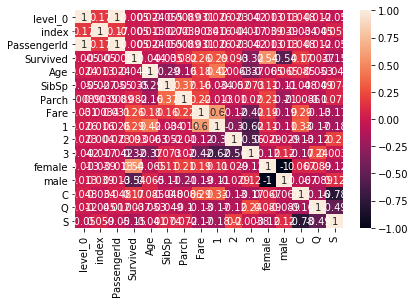

In [206]:
sns.heatmap(df.corr(),annot=True)

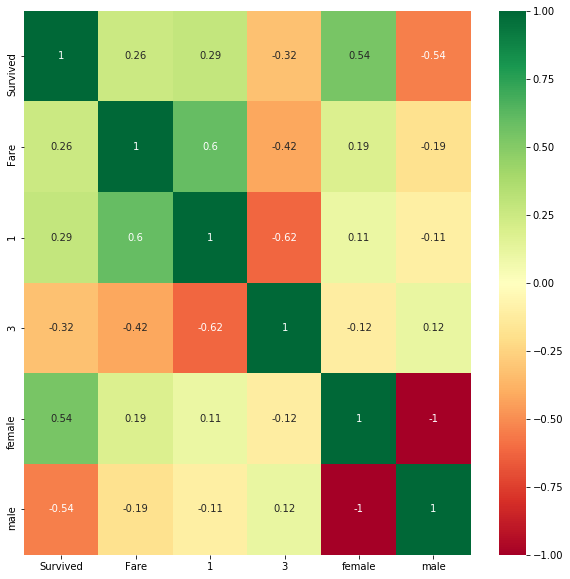

In [207]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Survived"])>0.2]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [208]:
test=df[df.Survived.isnull()]
train=df[df.Survived.notnull()]

In [209]:
y = train["Survived"]
features = [2, 1, 3, 'male', 'female', "Fare"]
X = train[features]
X_test = test[features]

In [212]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

In [211]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('final_submission.csv', index=False)